# Examen de Conocimiento - MCD Unison 
## Por: jose Luis Bracamonte Amavizca

### Crgando librerias de python requeridas

**NOTA**: es necesario instalar la libreria de python `openpyxl` ya que para la lecura de archivos exel 
es necesaria, puede instalarse de la siguiente manera utilizando pip:
```bash
pip install openpyxl
```

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md
%matplotlib inline

## 1 - Proyecto

1. Fork del repositorio del [examen](https://github.com/mcd-unison/examen-prog) en mi cuenta de github [luisjba/examwen-prog](https://github.com/luisjba/examen-prog).

2. Clonacion del repositorio en mi computadora local con el siguiente utilizando el siguiente comando:
```bash
git clone git@github.com:luisjba/examen-prog.git
```
3. Lenguage seleccionado: **Python en una libreta de Jupyter Notebook**.

## Lectura y procesamiento de datos

1. Leer Archivos `covid-data/200511COVID19MEXICO.csv` y `Catalogos_0412.xlsx`.

In [20]:
# lectura del archivo csv para futura manipulacion
dataset = pd.read_csv('./covid-data/200511COVID19MEXICO.csv', encoding='latin 1')

# lecura del archivo exel 'Catalogos_0412.xlsx', el cual contiene
# la resultado de SARS-COV-2 en la hoja 'Catálogo RESULTADO', seleccionado la columna 'CLAVE'
# como index y saltamos 2 renglones para inidicar donde inician los datos.
df_dictionary_resultado = pd.read_excel('./covid-data/Catalogos_0412.xlsx',
                                    sheet_name='Catálogo RESULTADO',
                                    index_col=1, #CLAVE 
                                    skiprows=1, 
                                    engine='openpyxl')

#### Explorando dataset

Mostrando las columnas

In [32]:
dataset.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-11,07f569,2,3,27,2,27,27,4,1,...,1,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-05-11,0b0e89,2,3,25,2,25,25,6,2,...,2,2,2,1,2,1,99,MÃ©xico,99,2
2,2020-05-11,0ecd46,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,2020-05-11,12eb62,2,3,25,1,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
4,2020-05-11,032c9a,2,3,25,2,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


#### Explorando diccionario de catalogo de resultados

In [21]:
df_dictionary_resultado.head()

,CLAVE
DESCRIPCIÓN,
Positivo SARS-CoV-2,1.0
No positivo SARS-CoV-2,2.0
Resultado pendiente,3.0
NaN,NaN
NaN,NaN


2. Generar Tabla con 5 columnas (3 columnas, aclaracion en slack)
    1. Fecha

    2. Confirmados de SARS-CoV2 en Sonora por fecha usando la fecha de inicio de síntomas (no acumulados)

    3. Decesos (entre los confirmados) por fecha.

In [76]:
# Aclaracion por slack(julio.waisman): Ups, lo que quería decir es que la fecha a tomar en cuenta es la fecha de inicio de síntomas
# Aclaracion por slack(julio.waisman):Ups, perdón, acabo de ver. Tuve problemas al actualizar el problema y al parecer no subió la versión final. Son sólo 3 columnas en este caso.

#Seleccionado columnas de interes
tabla1 = dataset[["ENTIDAD_RES","FECHA_SINTOMAS","FECHA_DEF", "RESULTADO"]]
print("Total de registros: {:,}".format(tabla1.shape[0]))

Total de registros: 135,116


El diccionario de resultados indica que para los casos **'Positivo SARS-CoV-2'**, la columna `RESULTADO` toma valor de `1`. Utilizaremos ese dato para filtar los casos positivos.


In [77]:
tabla1 = tabla1.loc[tabla1["RESULTADO"] == 1, :]
print("Total de casos Positivo SARS-CoV-2: {:,}".format(tabla1.shape[0]))

Total de casos Positivo SARS-CoV-2: 36,327


Para filtrar los casos pertenecientes en Sonora, utilizaremos la columna `ENTIDAD_RES` con el valor 26 que corresponde al estado de Sonora.

In [78]:
tabla1 = tabla1.loc[tabla1["ENTIDAD_RES"] == 26, :]
print("Total de casos Positivo SARS-CoV-2 en Sonora: {:,}".format(tabla1.shape[0]))

Total de casos Positivo SARS-CoV-2 en Sonora: 541


La columna de `FECHA_DEF` para valores diferentes a **'9999-99-99'** se considera que es un deceso. Utilizaremos ese valor para filtar los casos de deceso.

In [79]:
tabla1 = tabla1.loc[tabla1["FECHA_DEF"] != '9999-99-99', :]
print("Total Decesos en casos Positivo SARS-CoV-2 en Sonora: {:,}".format(tabla1.shape[0]))

Total Decesos en casos Positivo SARS-CoV-2 en Sonora: 33


3. Guardar la tabla como tabla1.csv, realizar un commit en el reposi- torio de GitHub.

In [80]:
tabla1.to_csv('./covid-data/tabla1.csv')

4. Generar una tabla con la cantidad de casos hospitalizados en los estados de
    **Sonora**, **Chihuahua**, **Nuevo León** y **Puebla**.

In [81]:
#Seleccionado columnas de interes
tabla2 = dataset[["ENTIDAD_RES","UCI"]]
print("Total de registros: {:,}".format(tabla2.shape[0]))

Total de registros: 135,116


La columns `UCI` con valores de 1, inidica que si requirio Hospitalizacion. Utilizaremos ese valor para fisltrar los hospitalizados.

In [82]:
tabla2 = tabla2.loc[tabla2["UCI"] == 1, :]
print("Total de casos hospitalizados: {:,}".format(tabla2.shape[0]))

Total de casos hospitalizados: 2,893


Los estados de **Sonora**, **Chihuahua**, **Nuevo León** y **Puebla** contienen los valores [26, 8, 19, 21, ] respectivaente para la columna 'MUNICIPIO_RES'

In [116]:
filtro_estados = (tabla2['ENTIDAD_RES'] == 26) | (tabla2['ENTIDAD_RES'] == 8) | (tabla2['ENTIDAD_RES'] == 19) | (tabla2['ENTIDAD_RES'] == 21)
tabla2 = tabla2.loc[filtro_estados, :]
print("Total de casos hospitalizados en Sonora, Chihuahua, Nuevo León y Puebla: {:,}".format(tabla2.shape[0]))

Total de casos hospitalizados en Sonora, Chihuahua, Nuevo León y Puebla: 230


5. Guardar la tabla como tabla2.csv, realizar un commit en el reposi- torio de GitHub.

In [117]:
tabla2.to_csv('./covid-data/tabla2.csv')

 6. Realizar dos gráficas y guardarlas en el repositorio como `grafica1.png` y
    `grafica2.png`, las cuales contengan lo siguiente:

    1. En `grafica1` realizar una gráfica de barras verticales con el número de
       casos hospitalizados (de acuerdo a nuestro archivo) de los estados de
       **Sonora**, **Chihuahua**, **Nuevo León** y **Puebla**.

    2. En `grafica2` graficar la serie de tiempo de confirmados a nivel Nacional en el tiempo.

### Grafica1

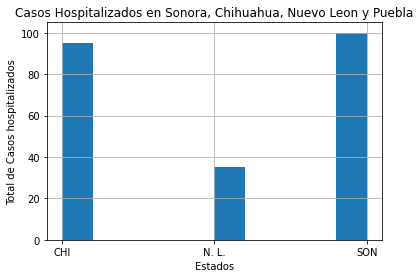

In [140]:
tabla2["estado"] = tabla2["ENTIDAD_RES"].astype("category")
tabla2["estado"].cat.categories = ["SON", "CHI", "N. L."]
hist_hospitalizados = tabla2["estado"].hist()
hist_hospitalizados.set_title("Casos Hospitalizados en Sonora, Chihuahua, Nuevo Leon y Puebla")
hist_hospitalizados.set_ylabel("Total de Casos hospitalizados")
hist_hospitalizados.set_xlabel("Estados")
hist_hospitalizados.get_figure().savefig("./covid-data/grafica1.png")

### Grafica2
Graficar la serie de tiempo a de confirmados a nivel Nacional en el tiempo

/Users/luisjba/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


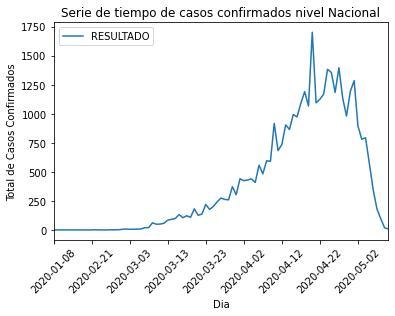

In [161]:
nacional_serie = dataset[["FECHA_SINTOMAS","RESULTADO"]]
nacional_serie = nacional_serie.loc[nacional_serie["RESULTADO"] == 1, :]
nacional_serie["tiempo"] = nacional_serie["FECHA_SINTOMAS"].astype("category")
serie_confirmados = nacional_serie.groupby("tiempo").sum().plot.line(rot=45)
# serie_confirmados.set_xticklabels(nacional_serie["tiempo"], rotation=35)
serie_confirmados.set_title("Serie de tiempo de casos confirmados nivel Nacional")
serie_confirmados.set_ylabel("Total de Casos Confirmados")
serie_confirmados.set_xlabel("Dia")
serie_confirmados.get_figure().savefig("./covid-data/grafica2.png")